***CodSoft Data Science Internship***

**Name:** Naga Hari Priyan M

**Batch:** JAN BATCH A27

**Task number:** 4

**Task:** Sales Prediction

**What I am going to do ?**

Data Collection -> Exploratory Data Analysis -> Preprocession -> Model Selection -> Prediction

# ***Data Collection***

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv(r"D:/Codsoft/Dataset/advertising/advertising.csv")
data.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


# ***Exploratory Data Analysis***

In [3]:
data.shape

(200, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Outlier Analysis

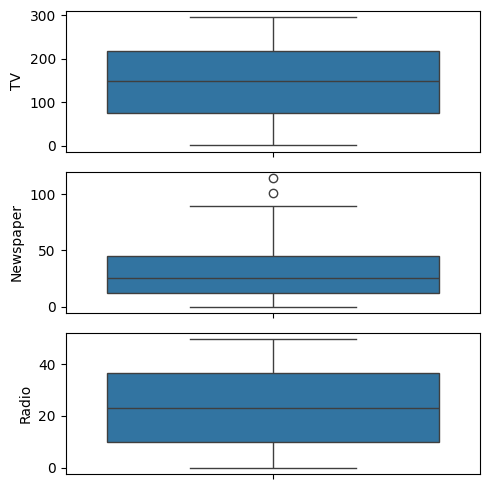

In [8]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt.tight_layout()

## **Correlation analysis**

In [7]:
corr_matr = data.corr()

In [8]:
corr_matr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


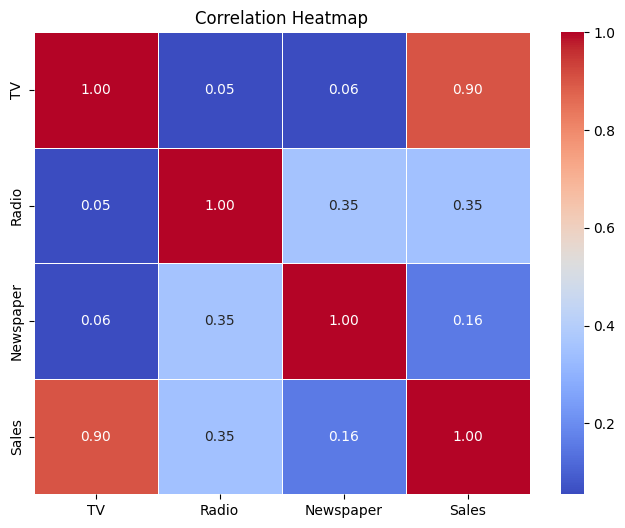

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Here there is 90% correlation is identified between TV and Sales (Target) variable. So in Linear Regression I am going to use only these 2 variables

## **Pair Plot**

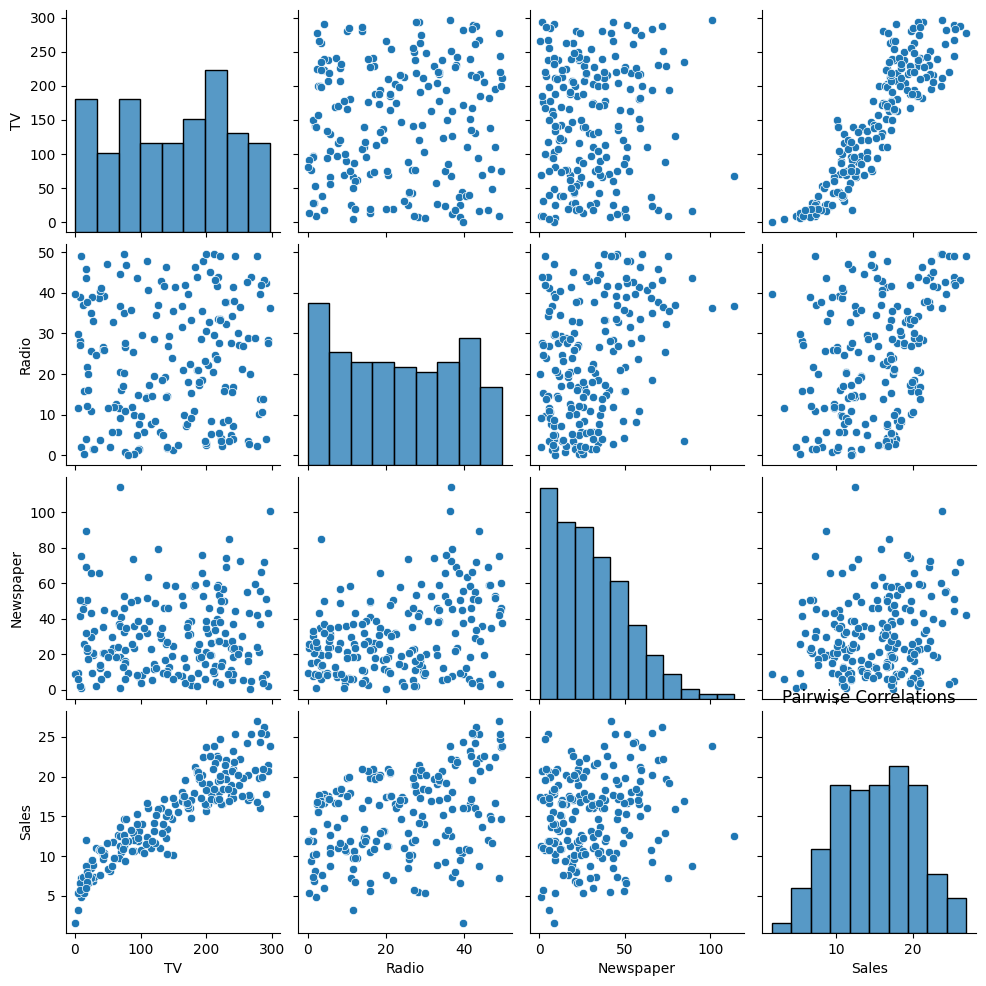

In [10]:
sns.pairplot(data)
plt.title('Pairwise Correlations')
plt.show()

## Outlier Detection using Box Plot**

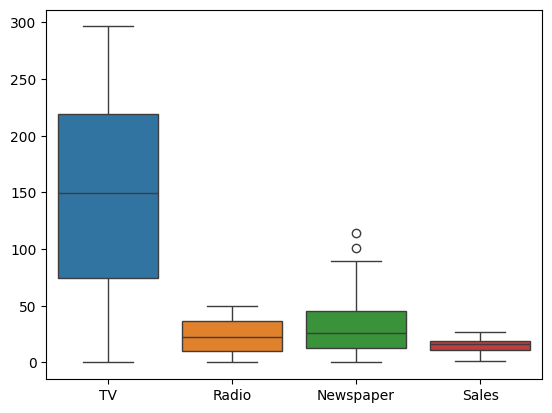

In [11]:
sns.boxplot(data)
plt.show()

Only 2 outliers in our dataset

1st I am going to train my model with out scaling and then i will train my model with scaling

# ***Splitting my data***

In [9]:
X = data['TV']
y = data['Sales']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [11]:
import statsmodels.api as sm

In [12]:
X_train_sm = sm.add_constant(X_train)

In [13]:
lr = sm.OLS(y_train, X_train_sm).fit()

In [14]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [15]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 08 Feb 2024   Prob (F-statistic):           1.52e-52
Time:                        11:49:47   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

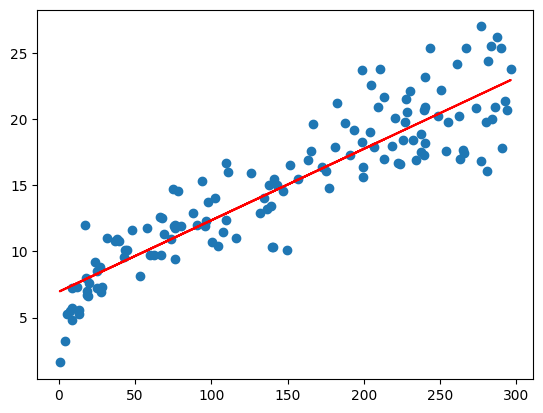

In [16]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

# Model Evaluation

In [17]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

In [18]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [19]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

In [20]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566